In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


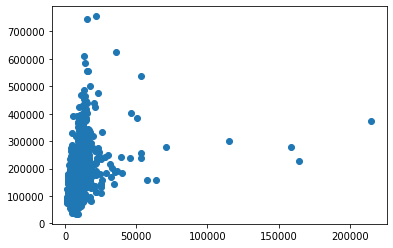

In [4]:
plt.scatter(df['LotArea'], df['SalePrice'])
plt.show()

In [5]:
df['LotArea'] = np.log(df['LotArea'])
df['SalePrice'] = np.log(df['SalePrice'])

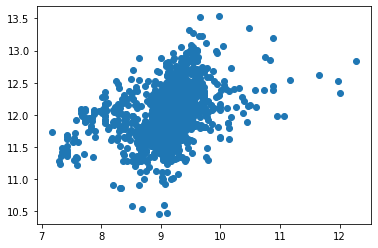

In [6]:
plt.scatter(df['LotArea'], df['SalePrice'])
plt.show()

### Random Init of Params

In [31]:
w1 = np.random.normal(0, 1)
b = np.random.normal(9, 1)

In [8]:
print(w1, b)

-0.4381646782065405 9.76717591476476


### Predictions

In [9]:
y_pred = w1 * df['LotArea'] + b

In [10]:
y_pred

0       5.805325
1       5.749417
2       5.679922
3       5.751705
4       5.576037
          ...   
1455    5.833873
1456    5.610712
1457    5.775655
1458    5.744109
1459    5.734299
Name: LotArea, Length: 1460, dtype: float64

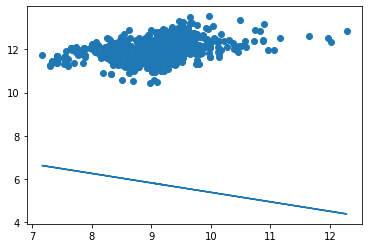

In [11]:
plt.scatter(df['LotArea'], df['SalePrice'])
plt.plot(df['LotArea'], y_pred)
plt.show()

### Calculate Loss and Cost

In [12]:
y = df['SalePrice']

In [13]:
loss = (1 / 2) * ((y_pred - y) ** 2)

In [14]:
loss

0       20.752060
1       20.222218
2       22.026510
3       18.590929
4       23.483032
          ...    
1455    19.460488
1456    22.072368
1457    22.562230
1458    18.729362
1459    19.017697
Length: 1460, dtype: float64

In [15]:
cost = np.sum(loss) / len(loss)

In [16]:
cost

19.666121900841464

#### Batch Gradient Descent

In [17]:
m = len(y)
m

1460

In [18]:
dw1 = np.sum((y - y_pred) * df['LotArea']) / m
db = np.sum(y - y_pred) / m

In [19]:
eta = 0.01

In [23]:
w1 = w1 - eta * dw1
b = b - eta * db

In [24]:
b

8.543349165586772

In [32]:
w1 = np.random.normal(0, 1)
b = np.random.normal(9, 1)
eta = 0.02
cost_per_iter = []

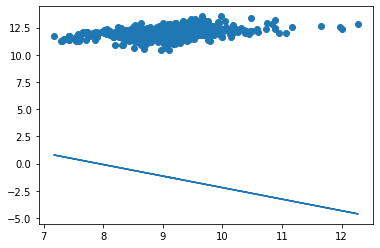

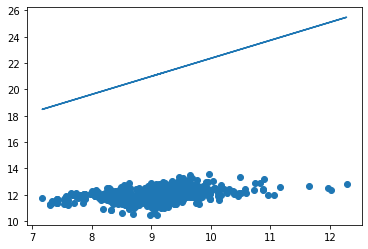

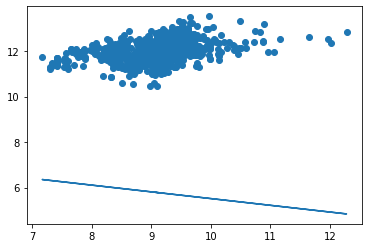

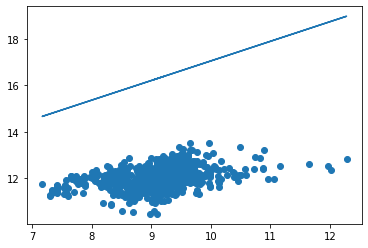

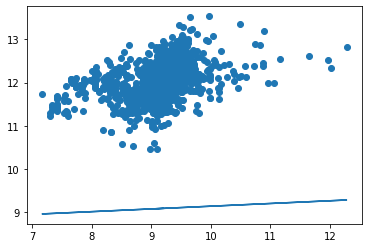

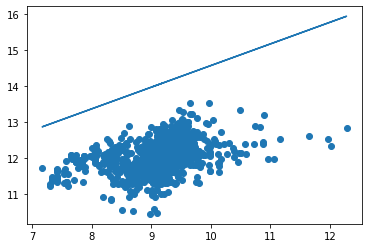

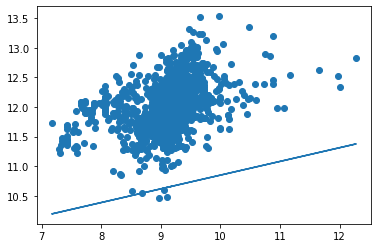

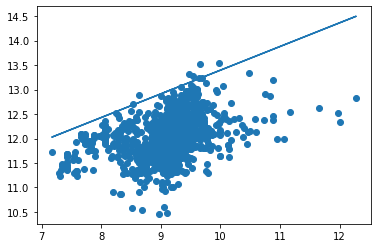

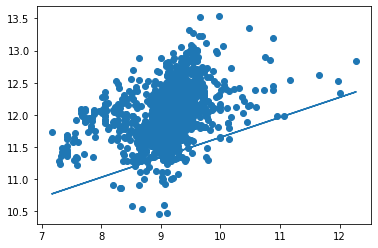

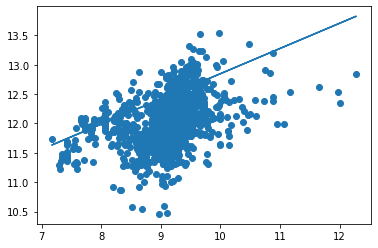

In [33]:
for i in range(10):
    # Predict
    y_pred = w1 * df['LotArea'] + b

    #Calc loss and cost
    loss = (1 / 2) * ((y_pred - y) ** 2)
    cost = np.sum(loss) / len(loss)
    
    cost_per_iter.append(cost)

    # Calc gradients
    dw1 = np.sum((y_pred - y) * df['LotArea']) / m
    db = np.sum(y_pred - y) / m

    # Batch Gradient Descent Update Rule
    w1 = w1 - eta * dw1
    b = b - eta * db
    
    plt.scatter(df['LotArea'], df['SalePrice'])
    plt.plot(df['LotArea'], y_pred)
    plt.show()

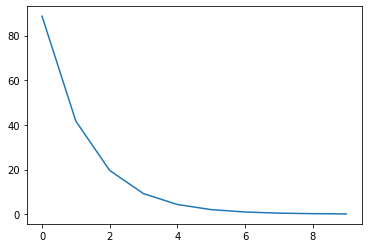

In [34]:
plt.plot(np.arange(0, len(cost_per_iter)), cost_per_iter)
plt.show()

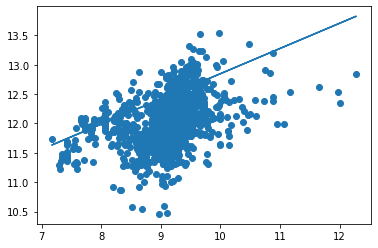

In [35]:
plt.scatter(df['LotArea'], df['SalePrice'])
plt.plot(df['LotArea'], y_pred)
plt.show()